In [3]:
%pylab inline
from mwlmc_bfe import smooth_coeff

Populating the interactive namespace from numpy and matplotlib


In [12]:
font = {'size':20, 'family':'serif'}
matplotlib.rc('font', **font)

In [221]:
# data 

covmat_lmc_path = '../data/LMC/BFE_bound/LMC_1M_iterative_bound_T_V_BFE_covmat_sample_0'
coeff_lmc_path = '../data/LMC/BFE_bound/LMC_1M_iterative_bound_T_V_BFE_coeff_sample_0'
mass = 1.7995383e-05


covmat_mwlmc_path = '../data/MW/MW_lmc_unbound/mwlmc_unbound_BFE_T_V_iterative_1e6_300_covmat_sample_0'
coeff_mwlmc_path = '../data/MW/MW_lmc_unbound/mwlmc_unbound_BFE_T_V_iterative_1e6_300_coeff_sample_0'


S_lmc, T_lmc, N_mw = smooth_coeff(coeff_lmc_path, covmat_lmc_path, 0, 4, 20, 20, 20, 8, mass)
S_mwlmc, T_mwlmc, N_mwlmc = smooth_coeff(coeff_mwlmc_path, covmat_mwlmc_path, 0, 4, 20, 20, 20, 4, mass)



/home/xzk/work/github/MW-LMC-SCF/code/coefficients_smoothing.py:109: RuntimeWarning: invalid value encountered in double_scalars
  bt = 1 / (1 + (varT/T**2))


In [222]:
def coeff_hist(S):
    vmin = np.ma.masked_invalid(np.log10(np.abs(S[:,:,0].flatten()))).min()
    vmax = np.max(np.log10(np.abs(S)))

    fig, ax = subplots(1, 3, figsize=(14, 4))

    fig.suptitle('LMC coefficients amplitudes', y=1.06)

    for i in range(3):
        im = ax[i].imshow(np.log10(np.abs(((S[:,:,i])))), origin='lower', cmap='BuPu', vmin=vmin, vmax=vmax)
        ax[i].set_xlim(-0.5, 10)
        ax[i].set_ylim(-0.5, 10)
        ax[i].set_xlabel('$n$')
        ax[i].set_title('$m=${}'.format(i))
        if i ==0:
            ax[i].set_ylabel('$l$')
    #ax[3].set_colorbar()
    fig.subplots_adjust(right=0.8)
    levels = np.arange(int(vmin-1),int(vmax+1),1)
    cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])
    cbar = fig.colorbar(im, cax=cbar_ax, ticks=levels)
    cbar.set_label(r'$\rm{Log_{10}\ S_{nlm}}$')


In [474]:
def coeff_power(S, T, fig_title, fig_name, max_m=0, max_n=0, max_l=0):
    
    vmin = np.ma.masked_invalid(np.log10((S**2 + T**2)**0.5)).min()
    vmax = np.max(np.log10((S**2 + T**2)**0.5))

    index_m = np.where(np.abs(S[:,:,:3])>0)
    if max_m==0:
        max_m = np.max(index_m[2])
    if max_n==0:
        max_n = np.max(index_m[0])
    if max_l==0:
        max_l = np.max(index_m[1])

    print(max_n, max_l)
    if max_m < 4:
        fig, ax = subplots(max_m+1, 1, figsize=(6, 9), sharex=True)
    elif ((max_m < 8) & (max_m>3)):
        fig, ax = subplots(2, 4, figsize=(14, 9), sharex=True, sharey=True)
    elif (max_m>7):
        fig, ax = subplots(3, 4, figsize=(14, 14), sharex=True, sharey=True)
    print(max_m)

    fig.suptitle(fig_title, y=1.02)

    if max_m < 5:
        for i in range(max_m+1):
            im = ax[i].imshow(np.log10((S[:,:,i]**2 + T[:,:,i]**2)**0.5).T, origin='lower', cmap='BuPu', vmin=vmin, vmax=vmax)
            ax[i].set_xlim(-1, max_n+1)
            ax[i].set_ylim(-1, max_l+1)
            ax[i].set_ylabel('$l$')
            ax[i].set_title('$m=${}'.format(i))
            ax[i].set_xticks(np.arange(0, max_n+1, 2))
            ax[i].set_yticks(np.arange(0, max_l+1, 2))
            ax[i].set_yticklabels(np.arange(0, max_l+1, 2))

            if i ==2:
                ax[i].set_xlabel('$n$')
    elif (max_m>3):
        j = 0 
        k=0
        for i in range(max_m+1):
            print(j, i)
            im = ax[j][k].imshow(np.log10((S[:,:,i]**2 + T[:,:,i]**2)**0.5).T, origin='lower', cmap='BuPu', vmin=vmin, vmax=vmax)
            ax[j][k].set_xlim(-1, max_n+1)
            ax[j][k].set_ylim(-1, max_l+1)
            ax[j][k].set_ylabel('$l$')
            ax[j][k].set_title('$m=${}'.format(i))
            k+=1
            if i == 2:
                ax[j][i].set_xlabel('$n$')
            elif i%3 == 0:
                j+=1 
                k=0
                
    fig.subplots_adjust(right=0.8)
    levels = np.arange(int(vmin-1),int(vmax+1),1)
    cbar_ax = fig.add_axes([0.15, -0.05, 0.8, 0.04])
    cbar = fig.colorbar(im, cax=cbar_ax, ticks=levels, orientation='horizontal')
    cbar.set_label(r'$\rm{Log_{10}\ \left( S_{nlm}^2 + T_{nlm}^2 \right)}$')
    fig.tight_layout()
    fig.savefig(fig_name, bbox_inches='tight')

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log10


20 8
2


/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


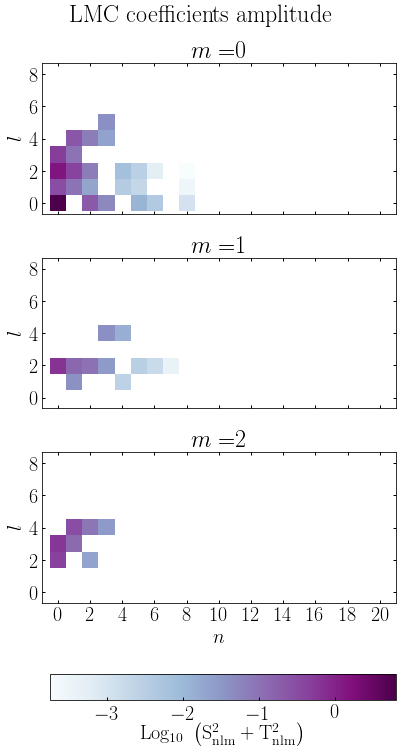

In [478]:
coeff_power(S_lmc, T_lmc, fig_title='LMC coefficients amplitude', fig_name='LMC_coefficients.png' ,max_n=20, max_l=8)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log10
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log10
/usr/local/lib/python3.5/dist-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


20 8
2


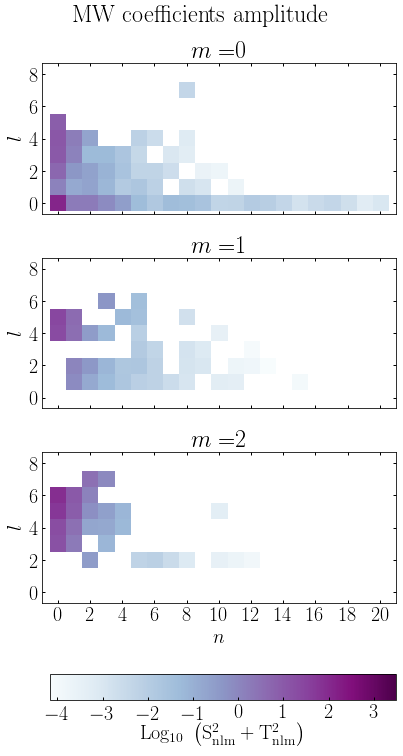

In [479]:
coeff_power(S_mwlmc, T_mwlmc, fig_title='MW coefficients amplitude', fig_name='MW_coefficients.png', max_m=2, max_n=20, max_l=8)

In [392]:
vmin

-3.7444750420722626

In [155]:
print(int(vmin-1))
print(int(vmax+1))

-4
1


In [167]:
np.arange(-4, 1.1, 1)

array([-4., -3., -2., -1.,  0.,  1.])